In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats
from statannot import add_stat_annotation
from itertools import combinations

In [36]:
root_dir = "/users/hjd/HJW_take_over/SNUH_hjd/best_models_for_manuscript/transfer/"

In [37]:
model_dir_list=[]
cv=20

for root,dirs,files in os.walk(root_dir):
    if 'pretrain' in root and 'Outer' not in root and 'other' not in root:
        if f'Outer_fold_{cv}' in os.listdir(root):
            model_dir_list.append(root)
for idx,dir in enumerate(model_dir_list):
    print(idx,dir)

0 /users/hjd/HJW_take_over/SNUH_hjd/best_models_for_manuscript/transfer/pretrain:True_trainext:False_trainprd:True
1 /users/hjd/HJW_take_over/SNUH_hjd/best_models_for_manuscript/transfer/pretrain:False_trainext:True_trainprd:True


In [40]:
for idx,model_dir in enumerate(model_dir_list):
    for idx2, fold in enumerate(os.listdir(model_dir)):
        if 'Outer_fold_' in fold and '_Full' not in fold:
            fold_direc = os.path.join(model_dir,fold)
            fold_csv = pd.read_csv(fold_direc+"/outer_cv.csv",sep=',',index_col=0)
            fold_csv['Fold'] = int(fold.split('_')[-1])
            if idx2 == 0:
                total_fold_csv = fold_csv
            else:
                total_fold_csv = pd.concat([total_fold_csv,fold_csv])

#     hsp = model_dir.split("Hsp:[")[1].split("]_")[0]
#     max_beta = model_dir.split("Maxb:[")[1].split("]_")[0]
#     beta_lr = model_dir.split("Betalr:[")[1].split("]_")[0]
#     lr = float(model_dir.split("LR:[")[1].split("]_")[0])
#     act_func = model_dir.split("Act:[")[1].split("]_")[0]
#     dropout = model_dir.split("DO:[")[1].split("]_")[0]
#     epoch = model_dir.split("epoch:[")[1].split("]_")[0]
#     pretrain = model_dir.split("pretrain:")[1].split("_")[0]
#     train_ext = model_dir.split("trainext:")[1].split("_")[0]
#     train_prd = model_dir.split("trainprd:")[1].split("_")[0]

    total_fold_csv[['model_idx','hsp','max_beta','beta_lr','lr',
                    'act_func','dropout','pretrain','train_ext','train_prd']] = idx,hsp,max_beta,beta_lr,lr,act_func,dropout,pretrain,train_ext,train_prd

    total_fold_csv.sort_values(by='Fold',inplace=True)
    total_fold_csv.reset_index(inplace=True,drop=True)
    total_fold_csv_melted = total_fold_csv.melt(id_vars=['Fold'],
                       value_vars=['train_acc','test_acc'])
    
#     plt.figure(figsize=(10,5))
#     plt.title(f"{model_dir.split('/')[-1]}")
#     sns.barplot(y='value',x='Fold',hue='variable',
#                 data=total_fold_csv_melted,orient='v',palette = sns.color_palette("tab10")[1:])
#     plt.ylabel("Pearson's r")
#     plt.xlabel(f"Mean(Train) :%.3f \u00B1 %.3f / Mean(Test) :%.3f \u00B1 %.3f" 
#               %(np.mean(total_fold_csv['train_acc']),np.std(total_fold_csv['train_acc']),
#                np.mean(total_fold_csv['test_acc']),np.std(total_fold_csv['test_acc'])))
#     plt.legend()
#     plt.show()
    
    if idx == 0:
        total_model_csv = total_fold_csv
    else:
        total_model_csv = pd.concat([total_model_csv,total_fold_csv])

In [41]:
for idx,model_dir in enumerate(model_dir_list):
    for idx2, fold in enumerate(os.listdir(model_dir)):
        if 'Outer_fold_' in fold and '_Full' not in fold:
            fold_direc = os.path.join(model_dir,fold)
            fold_csv = pd.read_csv(fold_direc+"/outer_cv.csv",sep=',',index_col=0)
            fold_csv['Fold'] = int(fold.split('_')[-1])
            if idx2 == 0:
                total_fold_csv = fold_csv
            else:
                total_fold_csv = pd.concat([total_fold_csv,fold_csv])
            total_fold_csv['model_idx']=idx
    if idx == 0:
        total_model_csv = total_fold_csv
    else:
        total_model_csv = pd.concat([total_model_csv,total_fold_csv])

In [42]:
total_model_csv_melt2 = total_model_csv.melt(id_vars=['model_idx'],value_vars=['test_acc','test_loss','test_corr_p'])

In [43]:
# total_model_csv_melt2 = total_model_csv.melt(id_vars=['model_idx'],value_vars=['valid_corr'])

In [44]:
total_model_csv

,train_acc,test_acc,test_corr_p,test_loss,test_mae,Fold,model_idx
0,0.379829,0.479088,0.023380,0.545685,0.545685,1,0
0,0.455442,0.358313,0.075428,0.692793,0.692793,2,0
0,0.446964,0.351255,0.087621,0.721918,0.721918,3,0
0,0.290515,-0.156104,0.466048,0.395926,0.395926,4,0
0,0.382652,0.608463,0.001008,0.402749,0.402749,5,0
0,0.480630,0.336616,0.128511,0.552823,0.552823,6,0
0,0.491433,0.260651,0.236424,0.622519,0.622519,7,0
0,0.294355,0.460611,0.026382,0.710638,0.710638,8,0
0,0.346467,0.263044,0.214535,0.744468,0.744468,9,0
0,0.127949,0.450496,0.022051,0.664444,0.664444,10,0


In [45]:
mean_mae_dict = {}
for idx,model_dir in enumerate(model_dir_list):
    mean_mae_dict[idx] = np.mean(total_model_csv.loc[total_model_csv['model_idx']==idx,'test_mae'])
model_order_sorted = pd.DataFrame.from_dict(mean_mae_dict,orient='index').sort_values(by=0).index

model_label_sorted = [model_dir.split('/')[-1] for model_dir in np.array(model_dir_list)[model_order_sorted]]
#[model_dir.split('DO:')[-1].split("_")[0] for model_dir in np.array(model_dir_list)[model_order_sorted]]

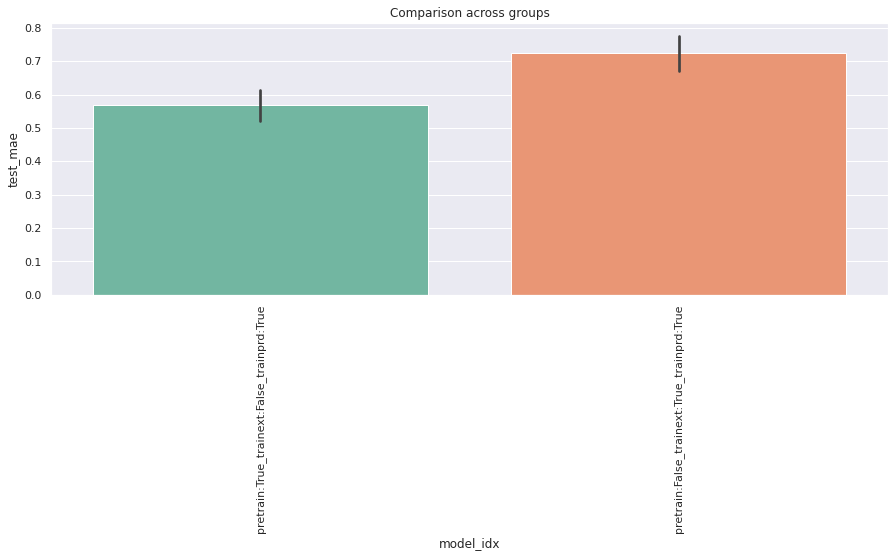

In [49]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
plt.title("Comparison across groups")
sns.barplot(y='test_mae',x='model_idx', order = model_order_sorted,
            #hue='variable',
            data=total_model_csv,orient='v',palette = sns.color_palette("Set2"))
# plt.ylim(0.6,0.8)
plt.xticks(ticks=np.arange(0,len(model_dir_list)),
           labels=model_label_sorted,
          rotation=90)
# plt.ylim(0.120,0.170)
# plt.ylim(0.55,0.72)
plt.show()

In [83]:
krr_result = np.array([0.5650161997318268,
 0.6493468364334107,
 0.6261391222953797,
 0.5037520750331879,
 0.5011300224399566,
 0.5588599279212952,
 0.6167367647647858,
 0.5969728166294097,
 0.6074357803153992,
 0.6405924326705933,
 0.5870404708957673,
 0.49699722573280325,
 0.5822308348274232,
 0.6296688352108002,
 0.5843326162290573,
 0.49842717240333556,
 0.5765046070194244,
 0.7250048812484742,
 0.611795563697815,
 0.48925589238166806])

krr_result.mean(), krr_result.std()

(0.5823620038940907, 0.05998402678767972)

In [84]:
krr_df = pd.DataFrame(columns=total_model_csv.columns)
krr_df['Fold'] = np.arange(1,21)
krr_df['test_mae'] = krr_result
krr_df['model_idx'] = 'krr'

In [86]:
total_model_csv_krr = pd.concat([total_model_csv,krr_df])
model_order_sorted_krr = model_order_sorted.tolist()
model_order_sorted_krr.insert(0,'krr')
model_label_sorted_krr = model_label_sorted.copy()
model_label_sorted_krr.insert(0,'KRR')

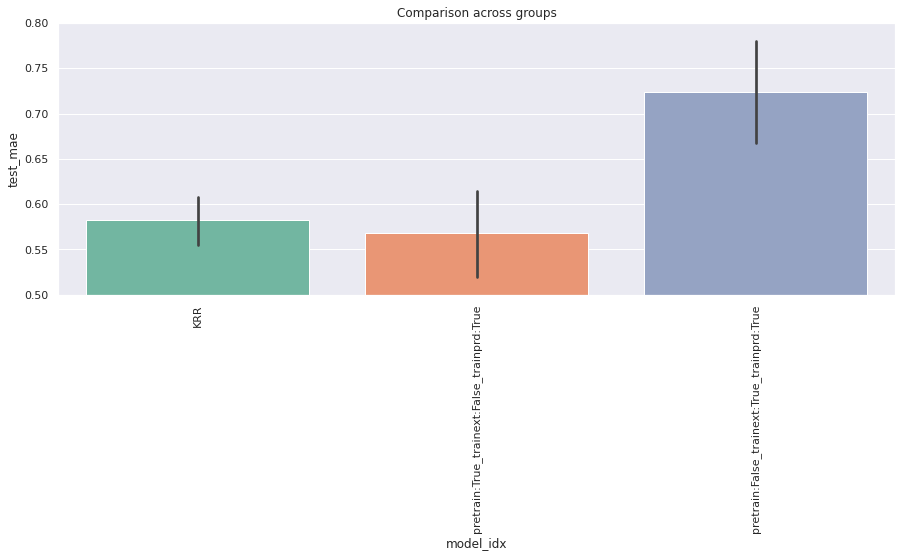

In [87]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
plt.title("Comparison across groups")
sns.barplot(y='test_mae',x='model_idx', order = model_order_sorted_krr,
            #hue='variable',
            data=total_model_csv_krr,orient='v',palette = sns.color_palette("Set2"))
# plt.ylim(0.6,0.8)
plt.xticks(ticks=np.arange(0,len(model_dir_list)+1),
           labels=model_label_sorted_krr,
          rotation=90)
# plt.ylim(0.120,0.170)
plt.ylim(0.5,0.8)
plt.show()

In [88]:
model1 = total_model_csv.loc[total_model_csv['model_idx']==0,'test_mae']
model2 = total_model_csv.loc[total_model_csv['model_idx']==1,'test_mae']
model1.reset_index(drop=True,inplace=True)
model2.reset_index(drop=True,inplace=True)

krr = krr_result
t,p = stats.ttest_rel(model1, model2)
t2,p2 = stats.ttest_rel(model1, krr)
t3,p3 = stats.ttest_rel(model2, krr)
print("Paired t-test between Model 1 & 2 = T-statistic: %.3f, p-value: %.3f"  %(t,p))
print("Paired t-test between Model 1 & krr = T-statistic: %.3f, p-value: %.3f"  %(t2,p2))
print("Paired t-test between Model 2 & krr = T-statistic: %.3f, p-value: %.3f"  %(t3,p3))

Paired t-test between Model 1 & 2 = T-statistic: -10.515, p-value: 0.000
Paired t-test between Model 1 & krr = T-statistic: -0.902, p-value: 0.378
Paired t-test between Model 2 & krr = T-statistic: 6.860, p-value: 0.000


In [89]:
compare_df = pd.concat([pd.DataFrame(krr),model1,model2],axis=1)
compare_df.columns = ['KRR','PRT','No_PRT']
compare_df_melt = compare_df.melt()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PRT v.s. No_PRT: t-test paired samples, P_val=2.329e-09 stat=-1.052e+01
KRR v.s. PRT: t-test paired samples, P_val=3.784e-01 stat=9.019e-01
KRR v.s. No_PRT: t-test paired samples, P_val=1.517e-06 stat=-6.860e+00


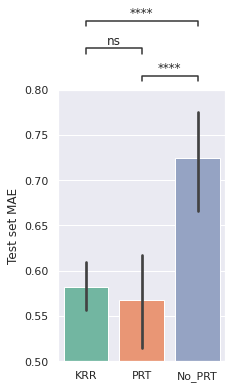

In [91]:
plt.figure(figsize=(3,5))
sns.set(style='darkgrid')
# plt.title("Comparison across ")
ax = sns.barplot(y='value',x='variable',order=['KRR','PRT','No_PRT'],
            data=compare_df_melt,orient='v',palette = sns.color_palette("Set2"))
ax.set_ylabel("Test set MAE")
ax.set_xlabel("")
ax.set_ylim(0.5,0.8)
test_results = add_stat_annotation(ax, data=compare_df_melt, x='variable', y='value',
                                   order=['KRR','PRT','No_PRT'],
                                   box_pairs=[('PRT','No_PRT'), ('No_PRT','KRR'), ('PRT', 'KRR')],
                                   test='t-test_paired', text_format='star',
                                   comparisons_correction=None,
                                   loc='outside', verbose=2)
plt.show()

In [77]:
total_model_csv.loc[total_model_csv['model_idx']==1,'test_acc'].mean(), total_model_csv.loc[total_model_csv['model_idx']==1,'test_acc'].std()

(0.24236179039647815, 0.18044134973445586)

In [78]:
total_model_csv.loc[total_model_csv['model_idx']==1,'test_mae'].mean(), total_model_csv.loc[total_model_csv['model_idx']==1,'test_mae'].std()

(0.7242754444479942, 0.13160612496661717)

In [80]:
ml_result = pd.read_csv("/users/hjd/IG_my_study/SNUH/data/p_factor_MLresult.csv")

## Compare between preprocess methods

In [80]:
root_dir = "/users/hjd/HJW_take_over/SNUH_hjd/"

model_dir_list=[]
cv=20

for root,dirs,files in os.walk(root_dir):
    if 'Smoothing' in root and 'trainable' in root and 'Outer' not in root:# and 'rtoz' in root:
        if f'Outer_fold_{cv}' in os.listdir(root):
            model_dir_list.append(root)
for dir in model_dir_list:
    print(dir)

/users/hjd/HJW_take_over/SNUH_hjd/transfer_model_Smoothing[True]_GSR[False]_rtoz/Hsp:[0.95,0.3]/Maxb:[0.02, 0.1]/Betalr:[0.0001, 0.001]/LR:[4e-05]/Act:[elu]/Opt:[nag]/DO:[0.95,0.0]/pretrain:True_trainable:False
/users/hjd/HJW_take_over/SNUH_hjd/transfer_model_Smoothing[True]_GSR[False]_rtoz/Hsp:[0.65,0.3]/Maxb:[0.02, 0.1]/Betalr:[0.0001, 0.001]/LR:[4e-05]/Act:[elu]/Opt:[nag]/DO:[0.95,0.0]/pretrain:False_trainable:True
/users/hjd/HJW_take_over/SNUH_hjd/transfer_model_Smoothing[False]_GSR[False]/Hsp:[0.95,0.3]/Maxb:[0.02, 0.1]/Betalr:[0.0001, 0.001]/LR:[4e-05]/Act:[elu]/Opt:[nag]/DO:[0.95,0.0]/pretrain:True_trainable:False
/users/hjd/HJW_take_over/SNUH_hjd/transfer_model_Smoothing[False]_GSR[False]_rtoz/Hsp:[0.95,0.3]/Maxb:[0.02, 0.1]/Betalr:[0.0001, 0.001]/LR:[4e-05]/Act:[elu]/Opt:[nag]/DO:[0.95,0.0]/pretrain:True_trainable:False
/users/hjd/HJW_take_over/SNUH_hjd/transfer_model_Smoothing[False]_GSR[True]/Hsp:[0.95,0.3]/Maxb:[0.02, 0.1]/Betalr:[0.0001, 0.001]/LR:[4e-05]/Act:[elu]/Opt:[na

In [58]:
len(model_dir_list)

9

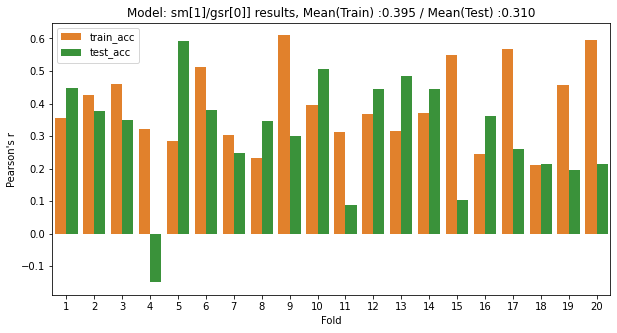

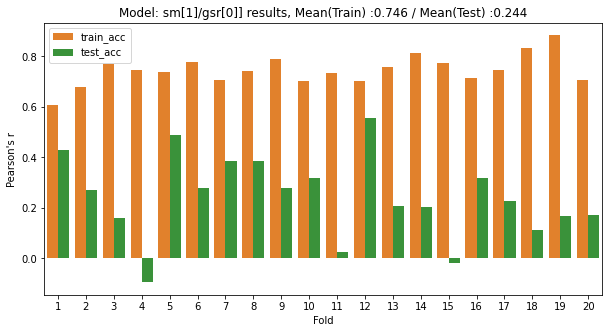

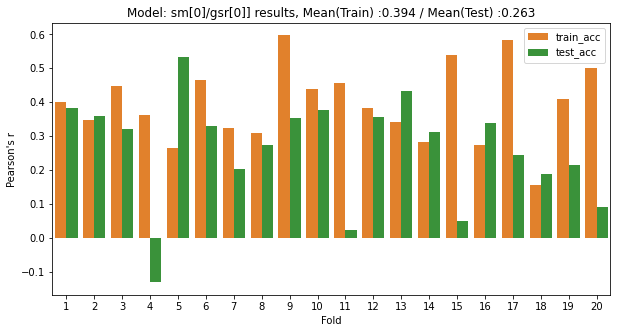

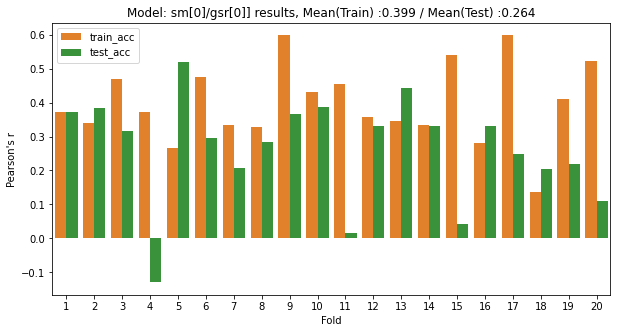

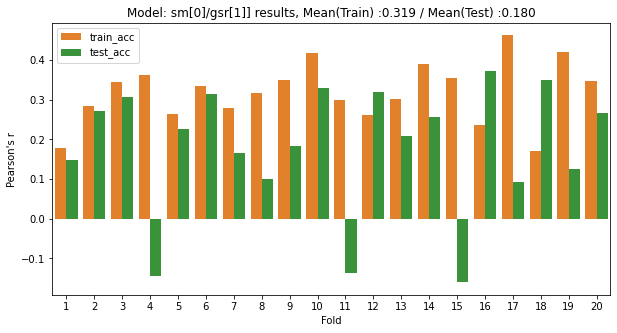

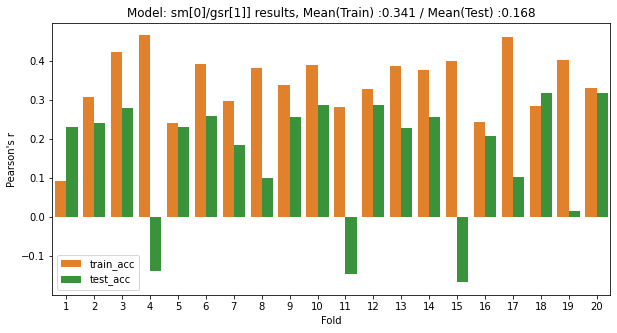

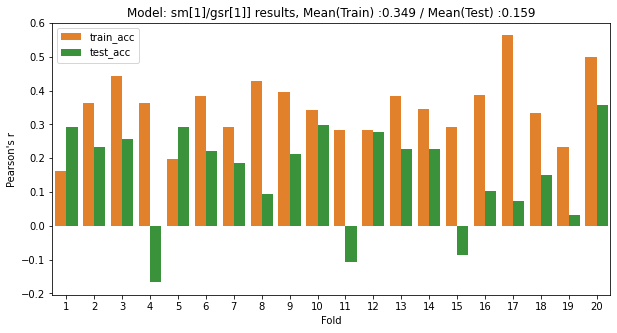

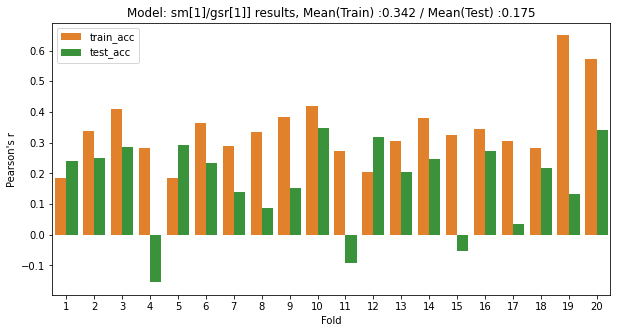

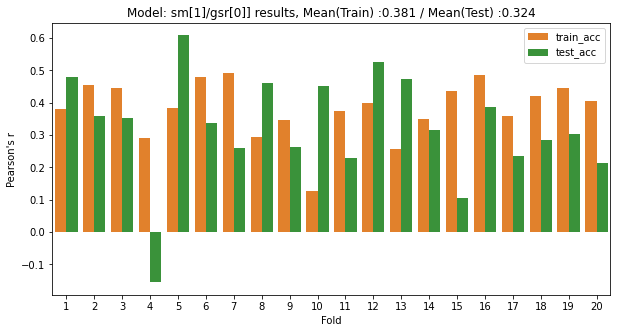

In [159]:
condition_list = []
for idx,model_dir in enumerate(model_dir_list):
    
    sm = [1 if model_dir.split("Smoothing[")[1].split("]")[0]=='True' else 0][0]
    gsr = [1 if model_dir.split("GSR[")[1].split("]")[0] == 'True' else 0][0]
    rtoz = [1 if '_rtoz' in model_dir.split("GSR[")[1].split("]")[1] else 0][0]
    condition_list.append(f"sm[{sm}]/gsr[{gsr}]/rtoz[{rtoz}]")
    
    for idx2, fold in enumerate(os.listdir(model_dir)):
        if 'Outer_fold_' in fold and '_full' not in fold:
            fold_direc = os.path.join(model_dir,fold)
            fold_csv = pd.read_csv(fold_direc+"/outer_cv.csv",sep=',',index_col=0)
            fold_csv['Fold'] = int(fold.split('_')[-1])
            if idx2 == 0:
                total_fold_df = fold_csv
            else:
                total_fold_df = pd.concat([total_fold_df,fold_csv])
    total_fold_df['sm'] = sm
    total_fold_df['gsr'] = gsr
    total_fold_df['rtoz'] = rtoz
    total_fold_df['idx'] = idx
    
    total_fold_df.sort_values(by='Fold',inplace=True)
    total_fold_df.reset_index(inplace=True,drop=True)
    total_fold_df_melted = total_fold_df.melt(id_vars=['Fold'],
                       value_vars=['train_acc','test_acc'])
    
    
    
    plt.figure(figsize=(10,5))
    plt.title(f"Model: sm[{sm}]/gsr[{gsr}]] results, Mean(Train) :%.3f / Mean(Test) :%.3f" 
              %(np.mean(total_fold_df['train_acc']),np.mean(total_fold_df['test_acc'])))
    sns.barplot(y='value',x='Fold',hue='variable',
                data=total_fold_df_melted,orient='v',palette = sns.color_palette("tab10")[1:])
    plt.ylabel("Pearson's r")
    plt.legend()
    plt.show()
    
    if idx ==0:
        total_model_df = total_fold_df
    else:
        total_model_df = pd.concat([total_model_df,total_fold_df])
#     break

In [43]:
total_model_csv_krr = pd.concat([total_model_csv,krr_df])

In [45]:
model_label_sorted

['Hsp:[0.9,0.8]_trainext:False_trainprd:True',
 'Hsp:[0.9,0.3]_trainext:False_trainprd:False',
 'Hsp:[0.9,0.8]_trainext:False_trainprd:False',
 'Hsp:[0.9,0.3]_trainext:False_trainprd:True',
 'Hsp:[0.5,0.3]_trainext:False_trainprd:True',
 'Hsp:[0.9,0.5]_trainext:False_trainprd:False',
 'Hsp:[0.5,0.5]_trainext:False_trainprd:True',
 'Hsp:[0.9,0.5]_trainext:False_trainprd:True',
 'Hsp:[0.5,0.3]_trainext:False_trainprd:False',
 'Hsp:[0.95,0.8]_trainext:False_trainprd:True',
 'Hsp:[0.5,0.5]_trainext:False_trainprd:False',
 'Hsp:[0.95,0.8]_trainext:False_trainprd:False',
 'Hsp:[0.5,0.8]_trainext:False_trainprd:False',
 'Hsp:[0.5,0.8]_trainext:False_trainprd:True',
 'Hsp:[0.95,0.5]_trainext:False_trainprd:True',
 'Hsp:[0.95,0.5]_trainext:False_trainprd:False',
 'Hsp:[0.95,0.3]_trainext:False_trainprd:False',
 'Hsp:[0.95,0.3]_trainext:False_trainprd:True',
 'Hsp:[0.8,0.3]_trainext:False_trainprd:False',
 'Hsp:[0.8,0.3]_trainext:False_trainprd:True',
 'Hsp:[0.8,0.5]_trainext:False_trainprd:Fals

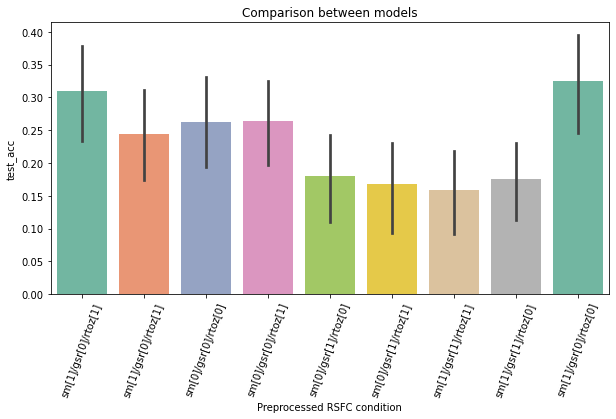

In [160]:
plt.figure(figsize=(10,5))
plt.title("Comparison between models")
fig = sns.barplot(y='test_acc',x='idx',#hue='',
            data=total_model_df,orient='v',palette = sns.color_palette("Set2"))
plt.xticks(ticks=fig.get_xticks(),labels=condition_list, rotation=70)
plt.xlabel("Preprocessed RSFC condition")
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test paired samples with Bonferroni correction, P_val=4.242e-03 stat=4.035e+00
1 v.s. 2: t-test paired samples with Bonferroni correction, P_val=8.689e-03 stat=3.721e+00
2 v.s. 3: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=7.090e-01
0 v.s. 2: t-test paired samples with Bonferroni correction, P_val=2.608e-04 stat=5.272e+00
1 v.s. 3: t-test paired samples with Bonferroni correction, P_val=1.539e-03 stat=4.480e+00
0 v.s. 3: t-test paired samples with Bonferroni correction, P_val=1.235e-05 stat=6.709e+00


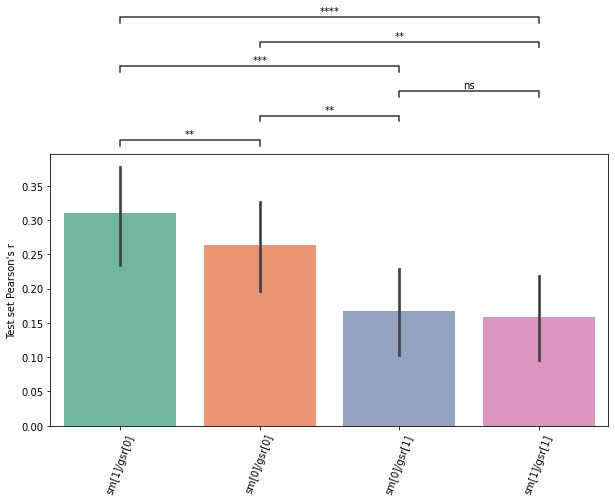

In [129]:
total_model_df['idx']=total_model_df['idx'].astype(str)
order=['0','1','2','3']

plt.figure(figsize=(10,5))
# plt.title("Comparison across ")
ax = sns.barplot(y='test_acc',x='idx',order=order,
            data=total_model_df,orient='v',palette = sns.color_palette("Set2"))
ax.set_ylabel("Test set Pearson's r")
ax.set_xlabel("")
test_results = add_stat_annotation(ax, data=total_model_df, x='test_acc', y='idx',
                                   order=order,
                                   box_pairs=list(combinations(order, 2)),
                                   test='t-test_paired', text_format='star',
                                   loc='outside', verbose=1)
plt.xticks(ticks=fig.get_xticks(),labels=condition_list, rotation=70)
plt.show()

In [34]:
model_order_sorted

Int64Index([ 1, 11,  0, 10, 22,  9, 20,  8, 23,  6, 21,  7, 19, 18,  5,  4,  2,
             3, 17, 16, 15, 14, 13, 12],
           dtype='int64')

## Transfer group check

In [149]:
cv = pd.read_csv("/users/hjd/HJW_take_over/Results/Transfer_HC+MDD_result/result_df.csv", sep='\t')
cfa_p = np.load("/users/hjw/data/SNUH/SNUH_CFA_p.npz")["p"]

In [150]:
total_cv_df = pd.DataFrame(columns=['cv','p','train/test'])

for j in range(len(cv)):
    cv_train_sbj = cv.loc[j,'train_idx'].replace('[','').replace(']','').replace('\n','').split(' ')
    cv_test_sbj = cv.loc[j,'test_idx'].replace('[','').replace(']','').replace('\n','').split(' ')
    cv_train_sbj_fin = [int(i) for i in cv_train_sbj if i!='']
    cv_test_sbj_fin = [int(i) for i in cv_test_sbj if i!='']
    hc_count = 0
    mdd_count = 0
    for i in cv_test_sbj_fin:
        if i<46:
            hc_count+=1
        else:
            mdd_count+=1

    print("CV",j+1,", Healthy",hc_count,", MDD",mdd_count)
    
    
    train_df = pd.DataFrame(columns=['cv','p','train/test'])
    test_df = pd.DataFrame(columns=['cv','p','train/test'])
    
    train_df['p'] = cfa_p[cv_train_sbj_fin]
    train_df['train/test'] = 'train'
    train_df['cv'] = j+1
    
    test_df['p'] = cfa_p[cv_test_sbj_fin]
    test_df['train/test'] = 'test'
    test_df['cv'] = j+1
    
    cv_df = pd.concat([train_df,test_df])
    
#     print('%.2f' %np.mean(cfa_p[cv_train_sbj_fin]),'%.2f' %np.std(cfa_p[cv_train_sbj_fin]))
#     print('%.2f' %np.mean(cfa_p[cv_test_sbj_fin]),'%.2f' %np.std(cfa_p[cv_test_sbj_fin]))
#     print("=================================")
    if len(total_cv_df)<1:
        total_cv_df = cv_df
    else:
        total_cv_df = pd.concat([total_cv_df,cv_df])

CV 1 , Healthy 12 , MDD 13
CV 2 , Healthy 12 , MDD 13
CV 3 , Healthy 4 , MDD 21
CV 4 , Healthy 9 , MDD 16
CV 5 , Healthy 7 , MDD 18
CV 6 , Healthy 7 , MDD 18
CV 7 , Healthy 14 , MDD 11
CV 8 , Healthy 4 , MDD 21
CV 9 , Healthy 6 , MDD 19
CV 10 , Healthy 9 , MDD 16
CV 11 , Healthy 10 , MDD 15
CV 12 , Healthy 8 , MDD 17
CV 13 , Healthy 9 , MDD 16
CV 14 , Healthy 12 , MDD 13
CV 15 , Healthy 8 , MDD 17
CV 16 , Healthy 9 , MDD 16
CV 17 , Healthy 8 , MDD 17
CV 18 , Healthy 13 , MDD 12
CV 19 , Healthy 9 , MDD 16
CV 20 , Healthy 8 , MDD 17


<AxesSubplot:xlabel='p', ylabel='cv'>

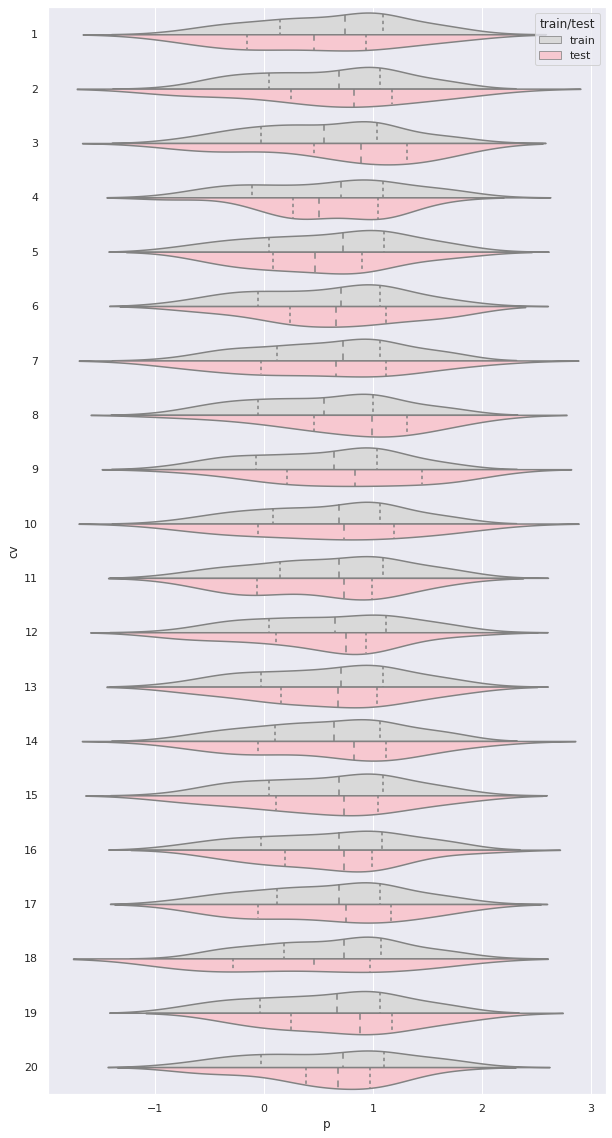

In [151]:
plt.figure(figsize=(10,20))
sns.violinplot(data=total_cv_df,x='p',y='cv',
               hue='train/test',orient='h',
               inner="quart",split=True,
              palette={"train": "0.85", "test": "pink"})

## 10 randomseed comparison

In [102]:
hsp="[0.95,0.3]"
max_b ="[0.2,0.4]"
beta_lr="[0.001,0.01]"
seed_list = [42, 7, 62, 85,  3, 19, 64, 16, 93, 20]

In [282]:
krr_result = pd.read_csv("/users/hjd/IG_my_study/SNUH/data/p_factor_MLresult.csv")
krr_result2 = pd.read_csv("/users/hjd/IG_my_study/SNUH/data/p_factor_MLresult_FE[0.95,0.3].csv")

In [283]:
root_dir = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/"

In [284]:
krr_result

,model,test_corr,test_corr_p,test_mae,fold,seed,test_sbj_idx
0,KRR,0.366054,0.071920,0.610134,1,42,[ 18 42 36 76 53 91 56 123 93 4 27 1...
1,KRR,0.139702,0.505394,0.667127,2,42,[115 15 37 33 6 7 9 116 112 99 17 ...
2,KRR,0.034229,0.870966,0.672044,3,42,[ 52 108 105 25 112 12 107 61 101 114 110 ...
3,KRR,-0.127004,0.545200,0.466343,4,42,[105 99 63 106 20 1 74 124 70 10 9 ...
4,KRR,0.375625,0.064257,0.514257,5,42,[ 97 75 44 82 118 14 5 52 121 94 86 ...
...,...,...,...,...,...,...,...
795,PLS,0.303172,0.140702,0.579899,16,20,[ 88 27 44 113 28 124 47 120 108 96 97 ...
796,PLS,0.367412,0.070793,0.589544,17,20,[ 94 103 61 95 117 1 6 33 82 116 78 ...
797,PLS,-0.159160,0.447301,0.571473,18,20,[ 60 61 21 17 91 88 49 111 123 93 14 ...
798,PLS,0.351060,0.085307,0.457032,19,20,[ 83 34 80 104 57 69 105 89 52 85 38 ...


In [285]:
cv=20

idx = 0
for seed in seed_list:
    print(seed,end=' ')
    prt_folder = f"Hsp:[0.95,0.3]_Maxb:[0.2, 0.4]_Betalr:[0.001, 0.01]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:{seed}"
    rand_folder = f"Hsp:[0.95,0.3]_Maxb:[0.2, 0.4]_Betalr:[0.001, 0.01]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:False_trainext:True_trainprd:True_seed:{seed}"
    
    for fold in range(1,cv+1):
        prt_cv_folder = pd.read_csv(os.path.join(root_dir,prt_folder,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
        prt_cv_folder['fold']=fold
        rand_cv_folder = pd.read_csv(os.path.join(root_dir,rand_folder,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
        rand_cv_folder['fold'] = fold
        
        if fold ==1:
            prt_df = prt_cv_folder
            rand_df = rand_cv_folder
        else:
            prt_df = pd.concat([prt_df,prt_cv_folder])
            rand_df = pd.concat([rand_df,rand_cv_folder])
    prt_df['seed'] = seed
    rand_df['seed'] = seed
    
    if idx ==0:
        prt_df_fin = prt_df
        rand_df_fin = rand_df
        idx=1
    else:
        prt_df_fin = pd.concat([prt_df_fin,prt_df])
        rand_df_fin = pd.concat([rand_df_fin,rand_df])
prt_df_fin['model'] = 'Fine-tuned'
rand_df_fin['model'] = 'Randominit'

42 7 62 85 3 19 64 16 93 20 

In [286]:
concat_df = pd.concat([prt_df_fin,rand_df_fin])
concat_df.rename(columns={"train_acc":"train_corr","test_acc":"test_corr"},inplace=True)

In [287]:
fin_df = pd.concat([concat_df,krr_result,krr_result2],join='inner')
fin_df

,test_corr,test_corr_p,test_mae,fold,seed,model
0,0.333271,0.103530,0.647498,1,42,Fine-tuned
0,0.256564,0.215718,0.799337,2,42,Fine-tuned
0,0.164203,0.432848,0.852415,3,42,Fine-tuned
0,0.156732,0.454351,0.601093,4,42,Fine-tuned
0,0.454760,0.022374,0.581291,5,42,Fine-tuned
...,...,...,...,...,...,...
795,0.117632,0.575481,0.662665,16,20,"PLS_FE[0.95,0.3]"
796,0.512475,0.008812,0.575850,17,20,"PLS_FE[0.95,0.3]"
797,-0.151453,0.469877,0.544869,18,20,"PLS_FE[0.95,0.3]"
798,0.020648,0.921960,0.573800,19,20,"PLS_FE[0.95,0.3]"


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Fine-tuned'),
  Text(1, 0, 'Randominit'),
  Text(2, 0, 'KRR'),
  Text(3, 0, 'KRR_FE[0.95,0.3]'),
  Text(4, 0, 'LR_ridge'),
  Text(5, 0, 'LR_ridge_FE[0.95,0.3]'),
  Text(6, 0, 'SVR'),
  Text(7, 0, 'SVR_FE[0.95,0.3]'),
  Text(8, 0, 'PLS'),
  Text(9, 0, 'PLS_FE[0.95,0.3]')])

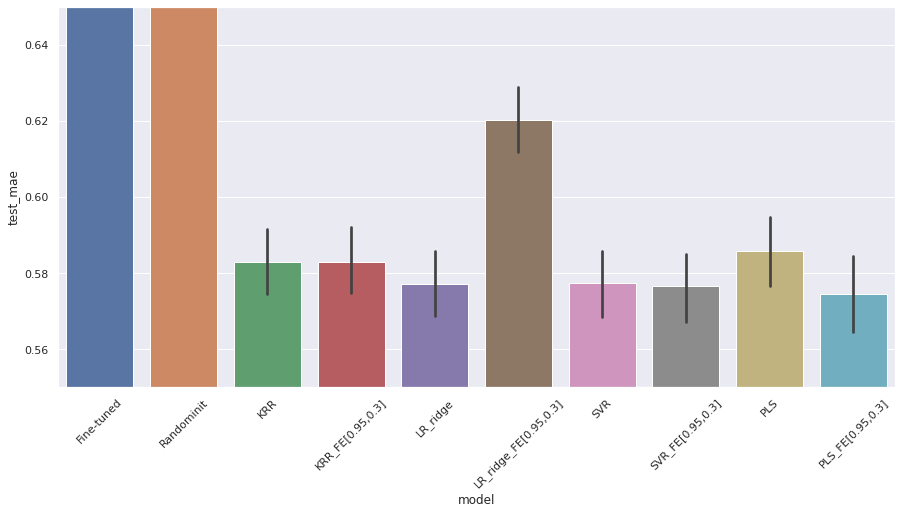

In [289]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,7))
ax = sns.barplot(x='model',y='test_mae',
#             hue='seed',
                 order =['Fine-tuned','Randominit',
                         'KRR','KRR_FE[0.95,0.3]',
                         'LR_ridge','LR_ridge_FE[0.95,0.3]',
                        'SVR','SVR_FE[0.95,0.3]',
                         'PLS','PLS_FE[0.95,0.3]'],
            data = fin_df)
plt.ylim(0.55,0.65)
plt.xticks(rotation=45)
# test_results = add_stat_annotation(ax, data=fin_df, x='model', y='test_mae',
#                                    order=['PRT','Randominit','KRR','LR_ridge','SVR','PLS'],
#                                    box_pairs=[('PRT','Randominit'), ('PRT','KRR'), ('Randominit', 'KRR')],
#                                    test='t-test_paired', text_format='star',
#                                    comparisons_correction='bonferroni',
#                                    loc='outside', verbose=2)

In [129]:
abcd_prt_mae = [0.44338408,
 0.44077346,
 0.45771584,
 0.44298568,
 0.4407963]

abcd_krr_mae =  [0.5322838042664286,
 0.531388536223978,
 0.5490090839640565,
 0.5255042244185957,
 0.5397799688701698]

In [130]:
np.mean(abcd_prt_mae), np.mean(abcd_krr_mae)

(0.445131072, 0.5355931235486456)

## Comparison according to transfer learning condition

In [170]:
tft = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.3]_Maxb:[0.2, 0.4]_Betalr:[0.001, 0.01]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:42"
tff = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.3]_Maxb:[0.2, 0.4]_Betalr:[0.001, 0.01]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:False_seed:42"
ttt = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.3]_Maxb:[0.2, 0.4]_Betalr:[0.001, 0.01]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:True_trainprd:True_seed:42"
ftt = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.3]_Maxb:[0.2, 0.4]_Betalr:[0.001, 0.01]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:False_trainext:True_trainprd:True_seed:42"

In [171]:
idx=0
for fold in range(1,cv+1):

    tft_cv_folder = pd.read_csv(os.path.join(tft,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    tft_cv_folder['fold']=fold
    tff_cv_folder = pd.read_csv(os.path.join(tff,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    tff_cv_folder['fold']=fold
    ttt_cv_folder = pd.read_csv(os.path.join(ttt,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    ttt_cv_folder['fold']=fold
    ftt_cv_folder = pd.read_csv(os.path.join(ftt,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    ftt_cv_folder['fold']=fold
    
    if fold ==1:
        tft_df = tft_cv_folder
        tff_df = tff_cv_folder
        ttt_df = ttt_cv_folder
        ftt_df = ftt_cv_folder

    else:
        tft_df = pd.concat([tft_df,tft_cv_folder])
        tff_df = pd.concat([tff_df,tff_cv_folder])
        ttt_df = pd.concat([ttt_df,ttt_cv_folder])
        ftt_df = pd.concat([ftt_df,ftt_cv_folder])
        
tft_df['model']="Transfer - fix1"
tff_df['model']="Transfer - fix1,2"
ttt_df['model']="Transfer - ft all"
ftt_df['model']="RandomInit"

In [172]:
result_df = pd.concat([tft_df,tff_df,ttt_df,ftt_df])

(0.65, 0.8)

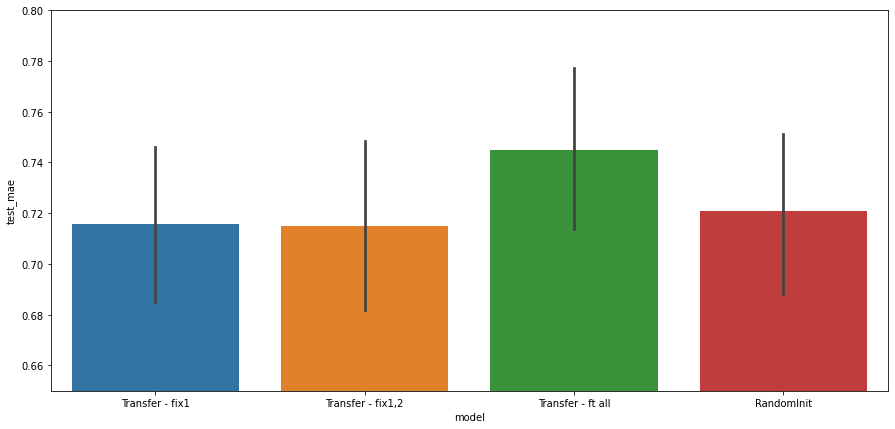

In [173]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='model',y='test_mae',
#             hue='seed',
            data = result_df)
plt.ylim(0.65,0.8)

## Comparison according 2nd layer sparsity

In [242]:
hsp03 = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.3]_Maxb:[0.2, 0.4]_Betalr:[0.001, 0.01]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:42"
hsp08 ="/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.8]_Maxb:[0.2, 0.4]_Betalr:[0.001, 0.01]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:42_from03"
hsp09 = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.9]_Maxb:[0.2, 0.8]_Betalr:[0.001, 0.02]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:42_from03"
hsp95_08 = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.8]_Maxb:[0.2, 0.1]_Betalr:[0.001, 0.005]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:42"
hsp95_08_f = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.95,0.8]_Maxb:[0.2, 0.1]_Betalr:[0.001, 0.005]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:42_full"
hsp975_08 = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.975,0.8]_Maxb:[0.2, 0.1]_Betalr:[0.001, 0.005]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:42"
hsp975_08_f = "/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/trasfer/p/Hsp:[0.975,0.8]_Maxb:[0.2, 0.1]_Betalr:[0.001, 0.005]_LR:[1e-05]_L2:[0.2]_Act:[elu]_Opt:[nag]_DO:[0.9,0.0]_epoch:[150]_pretrain:True_trainext:False_trainprd:True_seed:42_full"


In [247]:
idx=0
for fold in range(1,cv+1):

    hsp03_cv_folder = pd.read_csv(os.path.join(hsp03,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    hsp03_cv_folder['fold']=fold
    hsp08_cv_folder = pd.read_csv(os.path.join(hsp08,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    hsp08_cv_folder['fold']=fold
    hsp09_cv_folder = pd.read_csv(os.path.join(hsp09,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    hsp09_cv_folder['fold']=fold
    hsp95_08_cv_folder = pd.read_csv(os.path.join(hsp95_08,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    hsp95_08_cv_folder['fold']=fold
    hsp95_08_f_cv_folder = pd.read_csv(os.path.join(hsp95_08_f,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    hsp95_08_f_cv_folder['fold']=fold
    hsp975_08_cv_folder = pd.read_csv(os.path.join(hsp975_08,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    hsp975_08_cv_folder['fold']=fold
    hsp975_08_f_cv_folder = pd.read_csv(os.path.join(hsp975_08_f,f"Outer_fold_{fold}/outer_cv.csv"),index_col=0)
    hsp975_08_f_cv_folder['fold']=fold

    
    if fold ==1:
        hsp03_df = hsp03_cv_folder
        hsp08_df = hsp08_cv_folder
        hsp09_df = hsp09_cv_folder
        hsp95_08_df = hsp95_08_cv_folder
        hsp95_08_f_df = hsp95_08_f_cv_folder
        hsp975_08_df = hsp975_08_cv_folder
        hsp975_08_f_df = hsp975_08_f_cv_folder

    else:
        hsp03_df = pd.concat([hsp03_df,hsp03_cv_folder])
        hsp08_df = pd.concat([hsp08_df,hsp08_cv_folder])
        hsp09_df = pd.concat([hsp09_df,hsp09_cv_folder])
        hsp95_08_df = pd.concat([hsp95_08_df,hsp95_08_cv_folder])
        hsp95_08_f_df = pd.concat([hsp95_08_f_df,hsp95_08_f_cv_folder])
        hsp975_08_df = pd.concat([hsp975_08_df,hsp975_08_cv_folder])
        hsp975_08_f_df = pd.concat([hsp975_08_f_df,hsp975_08_f_cv_folder])
        
hsp03_df['model']="[0.95, 0.3]_from[0.95,0.3]"
hsp08_df['model']="[0.95, 0.8]_from[0.95,0.3]"
hsp09_df['model']="[0.95, 0.9]_from[0.95,0.3]"
hsp95_08_df['model'] = "[0.95, 0.8]_from[0.95,0.8]" 
hsp95_08_f_df['model'] = "[0.95, 0.8]_from[0.95,0.8]_fullsbj" 
hsp975_08_df['model'] = "[0.975, 0.8]_from[0.975,0.8]" 
hsp975_08_f_df['model'] = "[0.975, 0.8]_from[0.975,0.8]_fullsbj" 

result_df = pd.concat([hsp03_df,hsp08_df,hsp09_df,
                      hsp95_08_df,
#                        hsp95_08_f_df,
                       hsp975_08_df,
#                        hsp975_08_f_df
                      ])

(0.65, 0.76)

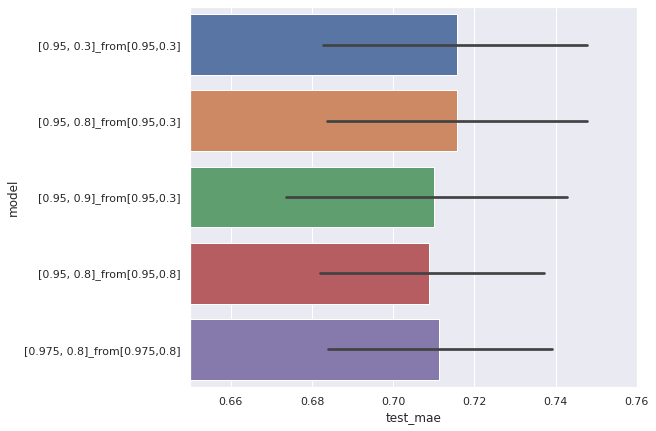

In [251]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='model',x='test_mae',
#             hue='seed',
            data = result_df,orient='h')
plt.xlim(0.65,0.76)